In [160]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
from scipy.stats import norm,kurtosis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [79]:
dataframe = pd.read_csv('tuition_info.csv')

In [80]:
dataframe.describe()

,serial,student_no,hour,days,subjects,salary
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,1.060000,1.570000,3.830000,3.420000,5615.00000
std,29.011492,0.238683,0.517472,0.817177,1.634106,2174.06081
min,1.000000,1.000000,1.000000,2.000000,1.000000,2000.00000
25%,25.750000,1.000000,1.000000,3.000000,2.000000,4000.00000
50%,50.500000,1.000000,2.000000,4.000000,3.000000,5000.00000
75%,75.250000,1.000000,2.000000,4.000000,5.000000,6000.00000
max,100.000000,2.000000,3.000000,6.000000,8.000000,15000.00000


In [81]:
dataframe.columns

Index(['serial', 'type', 'student_no', 'gender', 'hour', 'days', 'class',
       'subjects', 'location', 'background', 'institute', '    offer_date',
       'salary'],
      dtype='object')

In [82]:
dataframe["gender"] = dataframe["gender"].astype('category').cat.codes

In [83]:
dataframe["type"] = dataframe["type"].astype('category').cat.codes

In [84]:
dataframe["class"] = dataframe["class"].astype('category').cat.codes

In [85]:
dataframe["location"] = dataframe["location"].astype('category').cat.codes

In [86]:
dataframe["background"] = dataframe["background"].astype('category').cat.codes

In [87]:
dataframe["institute"] = dataframe["institute"].astype('category').cat.codes

In [88]:
dataframe['    offer_date'] = dataframe['    offer_date'].astype('category').cat.codes

In [89]:
dataframe

,serial,type,student_no,gender,hour,days,class,subjects,location,background,institute,offer_date,salary
0,1,1,1,2,2,4,19,3,12,0,1,0,6000
1,2,0,1,0,2,4,21,3,25,1,0,0,10000
2,3,0,1,0,2,3,21,1,18,1,0,0,4000
3,4,0,1,0,2,4,29,2,18,1,0,0,8000
4,5,0,1,1,2,4,28,3,25,1,0,0,8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,1,0,1,4,14,1,46,0,0,8,3000
96,97,1,1,0,2,3,1,1,12,1,0,8,3000
97,98,1,1,0,2,3,15,2,12,1,0,8,5000
98,99,0,1,0,2,3,12,4,7,0,2,8,6000


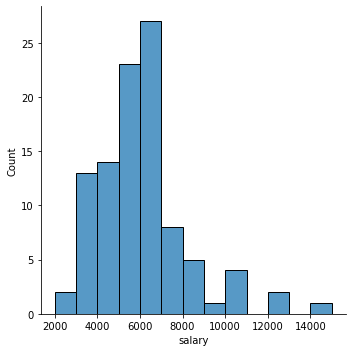

In [90]:
sns.displot(dataframe, x="salary", binwidth = 1000)

<AxesSubplot:xlabel='salary', ylabel='Density'>

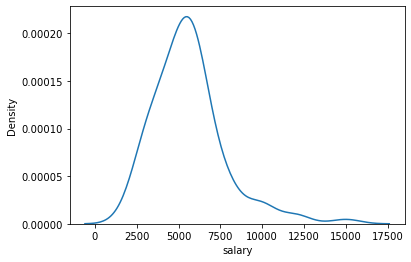

In [91]:
sns.kdeplot(data=dataframe, x="salary")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

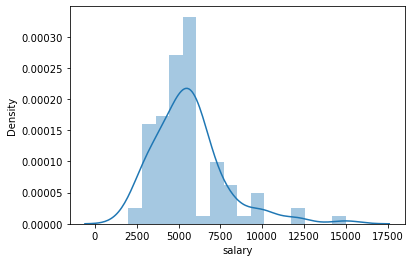

In [92]:
sns.distplot(dataframe['salary'], kde=True)

<AxesSubplot:xlabel='salary', ylabel='Count'>

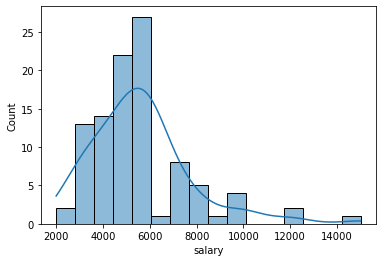

In [93]:
sns.histplot(data=dataframe, x="salary", kde=True)

In [94]:
dataframe['natural_log'] = np.log(dataframe['salary']) 

In [95]:
dataframe['logarithm_base2'] = np.log2(dataframe['salary']) 

In [96]:
dataframe.head()

,serial,type,student_no,gender,hour,days,class,subjects,location,background,institute,offer_date,salary,natural_log,logarithm_base2
0,1,1,1,2,2,4,19,3,12,0,1,0,6000,8.699515,12.550747
1,2,0,1,0,2,4,21,3,25,1,0,0,10000,9.210340,13.287712
2,3,0,1,0,2,3,21,1,18,1,0,0,4000,8.294050,11.965784
3,4,0,1,0,2,4,29,2,18,1,0,0,8000,8.987197,12.965784
4,5,0,1,1,2,4,28,3,25,1,0,0,8000,8.987197,12.965784


<AxesSubplot:xlabel='natural_log', ylabel='Count'>

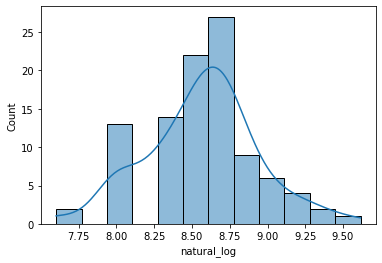

In [97]:
sns.histplot(data=dataframe, x="natural_log", kde=True)

<AxesSubplot:xlabel='logarithm_base2', ylabel='Count'>

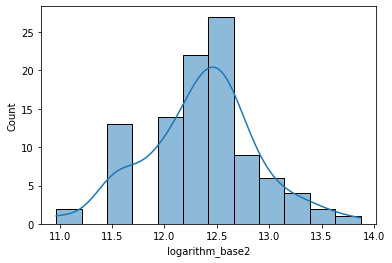

In [98]:
sns.histplot(data=dataframe, x="logarithm_base2", kde=True)

In [99]:
kurtosis(dataframe['salary'])

3.3671414661583006

In [100]:
kurtosis(dataframe['natural_log'])

0.40065666719908766

In [101]:
kurtosis(dataframe['logarithm_base2'])

0.40065666719908855

In [102]:
X = ['days','class','subjects','background']

In [103]:
y = ['salary']

In [104]:
dataframe[X]

,days,class,subjects,background
0,4,19,3,0
1,4,21,3,1
2,3,21,1,1
3,4,29,2,1
4,4,28,3,1
...,...,...,...,...
95,4,14,1,0
96,3,1,1,1
97,3,15,2,1
98,3,12,4,0


In [105]:
train_X, val_X, train_y, val_y = train_test_split(dataframe[X], dataframe[y], test_size = 0.10 ,random_state = 42)

In [106]:
val_y

,salary
83,5000
53,6000
70,6000
45,5000
44,4000
39,5000
22,7000
80,2000
10,5000
0,6000


In [107]:
DTregModel = DecisionTreeRegressor()

In [108]:
DTregModel.fit(train_X, train_y)

DecisionTreeRegressor()

In [109]:
DTregPred = DTregModel.predict(val_X)

In [110]:
print(DTregPred)

[6000. 5500. 3000. 5500. 6000. 6000. 6000. 4000. 5000. 3000.]


In [111]:
val_y

,salary
83,5000
53,6000
70,6000
45,5000
44,4000
39,5000
22,7000
80,2000
10,5000
0,6000


In [112]:
val_X

,days,class,subjects,background
83,4,16,4,0
53,5,13,2,0
70,3,19,2,0
45,4,7,5,0
44,2,2,2,1
39,5,8,7,0
22,3,9,3,0
80,4,9,1,0
10,3,9,2,0
0,4,19,3,0


In [113]:
print(mean_absolute_error(val_y, DTregPred))

1400.0


In [114]:
r2_squareDTR = r2_score(val_y, DTregPred,multioutput='variance_weighted')

In [115]:
rmseDTR = mean_squared_error(val_y, DTregPred, squared = False)

In [116]:
rmsleDTR = mean_squared_log_error(val_y, DTregPred)

In [117]:
print("Rsquare of DTR : {}".format(r2_squareDTR))
print("RMSE of DTR : {}".format(rmseDTR))
print("RMSLE of DTR : {}".format(rmsleDTR))

Rsquare of DTR : -0.7455621301775148
RMSE of DTR : 1717.5564037317667
RMSLE of DTR : 0.17117471306392923


In [118]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [119]:
regr.fit(train_X, train_y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [120]:
SVMpred = regr.predict(val_X)

In [121]:
r2_squareSVM = r2_score(val_y, SVMpred,multioutput='variance_weighted')

In [122]:
rmseSVM = mean_squared_error(val_y, SVMpred, squared = False)

In [123]:
rmsleSVM = mean_squared_log_error(val_y, SVMpred)

In [154]:
maeSVM = mean_absolute_error(val_y, SVMpred)

In [155]:
print("MAE of SVM : {}".format(maeSVM))
print("Rsquare of SVM : {}".format(r2_squareSVM))
print("RMSE of SVM : {}".format(rmseSVM))
print("RMSLE of SVM : {}".format(rmsleSVM))

MAE of SVM : 950.8358283888981
Rsquare of SVM : -0.012482423341833027
RMSE of SVM : 1308.0884127029403
RMSLE of SVM : 0.11493845604485775


In [125]:
print(mean_absolute_error(val_y, SVMpred))

950.8358283888981


In [126]:
Lassoclf = linear_model.Lasso(alpha=0.1)

In [127]:
Lassoclf.fit(train_X, train_y)

Lasso(alpha=0.1)

In [128]:
LassoPred = Lassoclf.predict(val_X)

In [129]:
LassoPred

array([6055.74993158, 5269.67032093, 5092.25559609, 6686.89162301,
       5166.49288459, 7564.27564522, 5744.92486584, 4894.26252023,
       5307.53137931, 5553.77371008])

In [130]:
print(mean_absolute_error(val_y, LassoPred))

1301.4579490994274


In [131]:
r2_squareLasso = r2_score(val_y, LassoPred, multioutput='uniform_average')

In [132]:
rmseLasso = mean_squared_error(val_y, LassoPred, squared = False)

In [133]:
rmsleLasso = mean_squared_log_error(val_y, LassoPred)

In [156]:
print("MAE of LassoRegression : {}".format(mean_absolute_error(val_y, LassoPred)))
print("Rsquare of LassoRegression : {}".format(r2_squareLasso))
print("RMSE of LassoRegression : {}".format(rmseLasso))
print("RMSLE of LassoRegression : {}".format(rmsleLasso))

MAE of LassoRegression : 1301.4579490994274
Rsquare of LassoRegression : -0.3905012084437749
RMSE of LassoRegression : 1532.9536986712872
RMSLE of LassoRegression : 0.12506119405633848


In [135]:
RiedgeClf = Ridge(alpha=1.0)

In [136]:
RiedgeClf.fit(train_X,train_y)

Ridge()

In [137]:
RiedgePred = RiedgeClf.predict(val_X)

In [138]:
RiedgePred

array([[6048.51662498],
       [5267.4305791 ],
       [5089.05230906],
       [6678.8415417 ],
       [5174.10025736],
       [7551.55593483],
       [5741.06470647],
       [4894.9162185 ],
       [5305.92711602],
       [5548.31659244]])

In [139]:
print(mean_absolute_error(val_y, RiedgePred))

1300.799350632285


In [140]:
r2_squareRiedge = r2_score(val_y, RiedgePred, multioutput='uniform_average')

In [141]:
rmseRiedge = mean_squared_error(val_y, RiedgePred, squared = False)

In [142]:
rmsleRiedge = mean_squared_log_error(val_y, RiedgePred)

In [158]:
print("MAE of RiedgeRegression : {}".format(mean_absolute_error(val_y, RiedgePred)))
print("Rsquare of RiedgeRegression : {}".format(r2_squareRiedge))
print("RMSE of RiedgeRegression : {}".format(rmseRiedge))
print("RMSLE of RiedgeRegression : {}".format(rmsleRiedge))

MAE of RiedgeRegression : 1300.799350632285
Rsquare of RiedgeRegression : -0.38676899860176084
RMSE of RiedgeRegression : 1530.895034820146
RMSLE of RiedgeRegression : 0.1249760612172945


In [144]:
Logclf = LogisticRegression(random_state=0)

In [145]:
Logclf.fit(train_X, train_y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [146]:
logPred = Logclf.predict(val_X)

In [147]:
logPred

array([6000, 5000, 3000, 6000, 4000, 6000, 6000, 4000, 4000, 5000],
      dtype=int64)

In [148]:
val_y

,salary
83,5000
53,6000
70,6000
45,5000
44,4000
39,5000
22,7000
80,2000
10,5000
0,6000


In [149]:
print(mean_absolute_error(val_y, logPred))

1200.0


In [150]:
r2_squareLog = r2_score(val_y, logPred, multioutput='uniform_average')

In [151]:
rmseLog = mean_squared_error(val_y, logPred, squared = False)

In [152]:
rmsleLog = mean_squared_log_error(val_y, logPred)

In [159]:
print("MAE of LogisticRegression : {}".format(mean_absolute_error(val_y, logPred)))
print("Rsquare of LogisticRegression : {}".format(r2_squareLog))
print("RMSE of LogisticRegression : {}".format(rmseLog))
print("RMSLE of LogisticRegression : {}".format(rmsleLog))

MAE of LogisticRegression : 1200.0
Rsquare of LogisticRegression : -0.18343195266272194
RMSE of LogisticRegression : 1414.213562373095
RMSLE of LogisticRegression : 0.11999995072064609


In [161]:
reg = LinearRegression()

In [162]:
reg.fit(train_X, train_y)

LinearRegression()

In [164]:
regPred =  reg.predict(val_X)

In [166]:
r2_squareReg = r2_score(val_y, regPred, multioutput='uniform_average')

In [167]:
rmseReg = mean_squared_error(val_y, regPred, squared = False)

In [168]:
rmsleReg = mean_squared_log_error(val_y, regPred)

In [169]:
print("MAE of LinearRegression : {}".format(mean_absolute_error(val_y, regPred)))
print("Rsquare of LinearRegression : {}".format(r2_squareReg))
print("RMSE of LinearRegression : {}".format(rmseReg))
print("RMSLE of LinearRegression : {}".format(rmsleReg))

MAE of LinearRegression : 1301.4574831630262
Rsquare of LinearRegression : -0.39066551956866724
RMSE of LinearRegression : 1533.0442681380887
RMSLE of LinearRegression : 0.12506784337866686
